<a href="https://colab.research.google.com/github/Neha-S-22/AI-projects/blob/main/PlantDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/plant-pathology-2020-fgvc7/train.csv')

In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/plant-pathology-2020-fgvc7/train.csv')

# Preprocess a subset of the dataset
image_dir = '/content/gdrive/MyDrive/plant-pathology-2020-fgvc7/images/'  # Directory containing the plant leaf
images = []
labels = []

for i in range(len(dataset)):
    image_path = image_dir + dataset.loc[i, 'image_id'] + '.jpg'

    try:
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Error reading image: {image_path}")

        resized_image = cv2.resize(image, (224, 224))
        normalized_image = resized_image / 255.0
        images.append(normalized_image)
        labels.append(dataset.loc[i, 'healthy':'scab'].values)
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(f"Error message: {str(e)}")

In [ ]:
# Convert images and labels to numpy arrays
X = np.array(images)
y = np.array(labels).astype(np.float32)  # Convert labels to numpy.float32
y = np.argmax(y, axis=1)

In [ ]:
# Perform label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the pretrained model as a feature extractor
pretrained_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [ ]:
# Freeze the weights of the pretrained model
pretrained_model.trainable = False

In [ ]:
# Flatten the output of the pretrained model
flatten = Flatten()

In [ ]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Create the model
model = Sequential()
model.add(pretrained_model)
model.add(flatten)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
46/46 [==============================] - 208s 4s/step - loss: 1.3540 - accuracy: 0.3276 - val_loss: 1.2639 - val_accuracy: 0.2959
Epoch 2/10
46/46 [==============================] - 199s 4s/step - loss: 1.2511 - accuracy: 0.3400 - val_loss: 1.2525 - val_accuracy: 0.3288
Epoch 3/10
46/46 [==============================] - 198s 4s/step - loss: 1.1980 - accuracy: 0.4148 - val_loss: 1.1445 - val_accuracy: 0.4877
Epoch 4/10
46/46 [==============================] - 200s 4s/step - loss: 1.1365 - accuracy: 0.4883 - val_loss: 1.1815 - val_accuracy: 0.4438
Epoch 5/10
46/46 [==============================] - 200s 4s/step - loss: 1.0406 - accuracy: 0.5639 - val_loss: 1.1927 - val_accuracy: 0.4932
Epoch 6/10
46/46 [==============================] - 199s 4s/step - loss: 0.8374 - accuracy: 0.6751 - val_loss: 1.1337 - val_accuracy: 0.5616
Epoch 7/10
46/46 [==============================] - 200s 4s/step - loss: 0.6284 - accuracy: 0.7761 - val_loss: 1.2235 - val_accuracy: 0.5890
Epoch 8/10
46

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_decoded = np.argmax(y_pred, axis=1)
y_test_decoded = np.argmax(y_test, axis=1)

In [ ]:
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
report = classification_report(y_test_decoded, y_pred_decoded)

In [ ]:
print("Accuracy: ", accuracy*100,"%")
print("Classification Report:")
print(report)

Accuracy:  61.917808219178085 %
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       100
           1       0.05      0.06      0.05        18
           2       0.79      0.64      0.71       120
           3       0.62      0.69      0.65       127

    accuracy                           0.62       365
   macro avg       0.51      0.50      0.50       365
weighted avg       0.64      0.62      0.62       365



12/12 [==============================] - 15s 1s/step


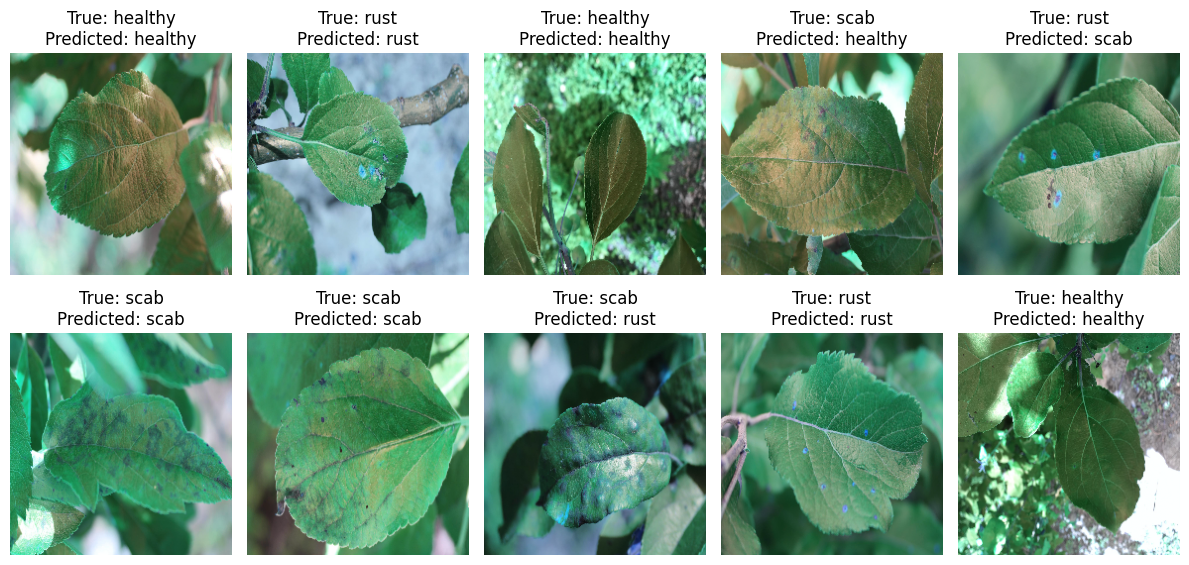

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_decoded = np.argmax(y_pred, axis=1)

# Decode the labels
class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']
y_test_decoded = np.argmax(y_test, axis=1)

# Plot a random subset of images with their predicted labels
num_images = 10
random_indices = np.random.choice(range(len(X_test)), size=num_images, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    img = X_test[idx]
    label_true = class_names[y_test_decoded[idx]]
    label_pred = class_names[y_pred_decoded[idx]]

    axes[i].imshow(img)
    axes[i].set_title(f'True: {label_true}\nPredicted: {label_pred}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()